In [1]:
# Homemade imports
from dataset import get_path, get_subjects, epoch_runs
from plot import plot_subject

# General imports
import numpy as np
import mne
import hydra
from omegaconf import DictConfig


In [2]:
path = get_path("LPP_read")
subjects = get_subjects(path)
RUN = 1
task = "read"
subject = subjects[4]

In [3]:
epochs = epoch_runs(subject, RUN, task, path)

.Running the script on RAW data:
run 01, subject: 5
Opening raw data file /home/co/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 89000 ... 554999 =     89.000 ...   554.999 secs
Ready.
Reading events from /home/co/data/BIDS

/home/co/workspace_LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:80: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:80: RuntimeWarning: Omitted 128 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:80: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/home/co/workspace_LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:80: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


1468 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    4.0s finished


Adding metadata with 13 columns
1411 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1411 events and 1001 original time points (prior to decimation) ...


/home/co/workspace_LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:141: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
Adding metadata with 14 columns
1411 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)


/home/co/workspace_LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:315: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(epochs)


In [42]:
def epochs_(epochs, column, value):
    meta  = epochs.metadata
    subset = meta[meta[column]==value].level_0
    return epochs[subset]


In [59]:
epochs.metadata['n_closing'][:50]

0     1
1     1
2     1
3     4
4     1
5     2
6     1
7     2
8     1
9     1
10    2
11    1
12    1
13    1
14    1
15    1
16    1
17    4
18    2
19    1
20    1
21    6
22    2
23    2
24    1
25    1
26    1
27    2
28    2
29    1
30    5
31    2
32    1
33    1
34    1
35    5
36    1
37    2
38    1
39    1
40    1
41    1
42    2
43    2
44    1
45    1
46    1
47    3
48    1
49    1
Name: n_closing, dtype: int64

In [55]:
epochs_(epochs,'is_last_word',True)

Number of events,18
Events,1: 18
Time range,-0.200 – 0.800 sec
Baseline,-0.200 – 0.000 sec


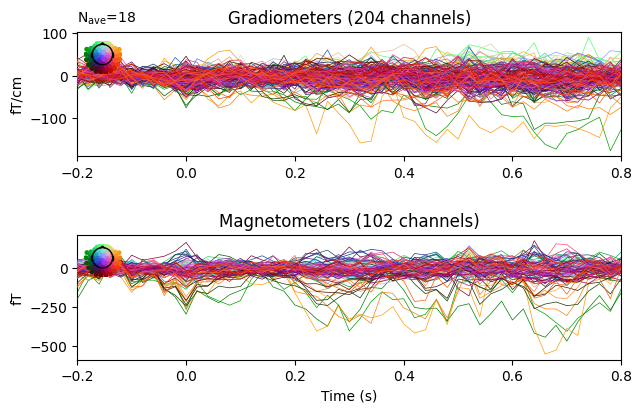

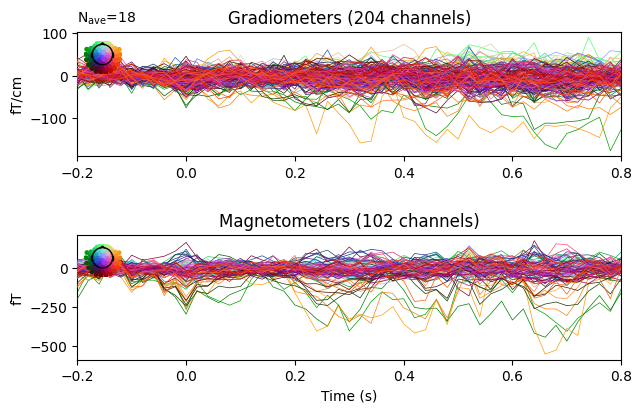

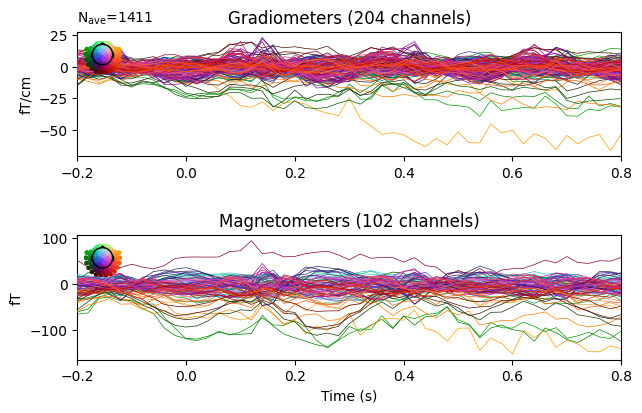

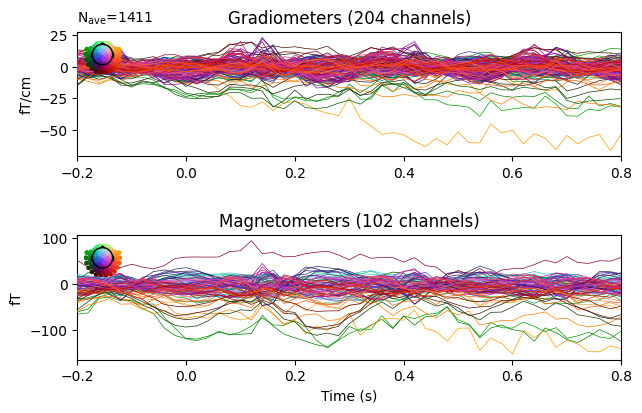

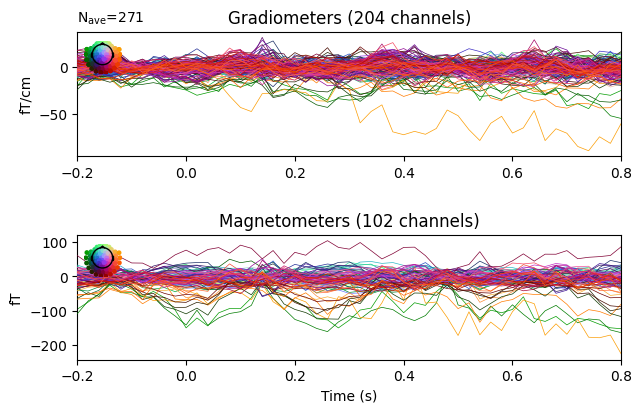

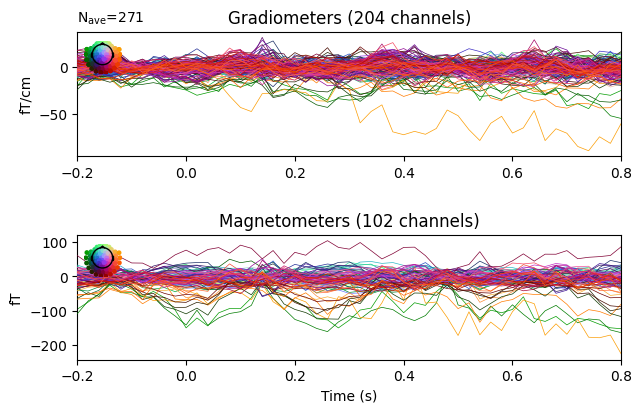

In [53]:
import matplotlib.pyplot as plt
# Build a 3x2 plot, with for each condition (sentence, word, constituent), and for (start, end),
# the ERP associated
cond = {'sentence': {'column':'is_last_word','target':True},
        'word': {'column':'kind','target':'word'},
        'constituent': {'column':'n_closing','target':2}}

cases = {'start', 'end'}

i = 1
for condi in cond:
    for case in cases:
        ep = epochs_(epochs, cond[condi]['column'], cond[condi]['target'])
        ax = fig.add_subplot(3, 2, i)
        #ep.average().plot(gfp='only')
        evo = ep.average(method="median")
        evo.plot(spatial_colors=True)
        i = i + 1
        ax.set_title(f'Plot {cond}')


plt.show()


In [ ]:
epochs_4 = epochs_(epochs, 'n_closing', 4)

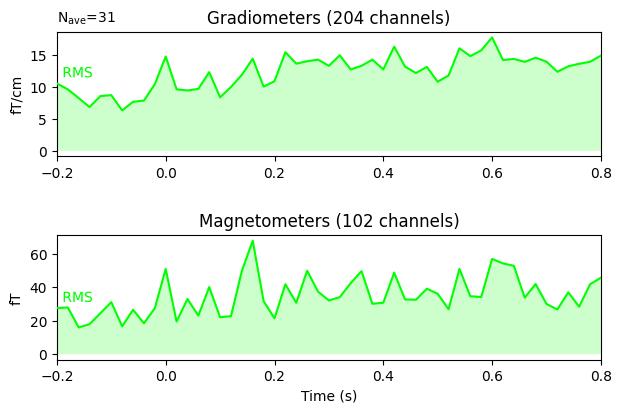

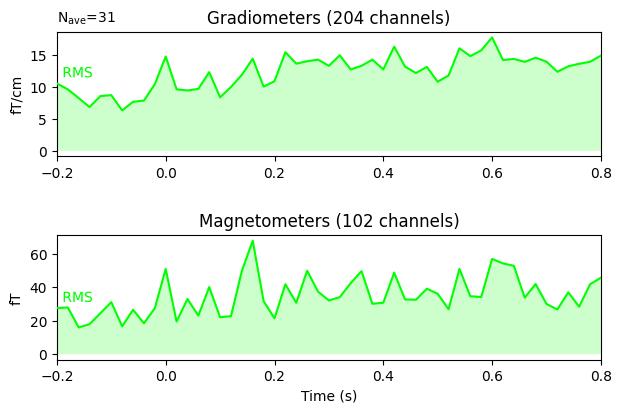

In [41]:
epochs_4.average().plot(gfp='only')

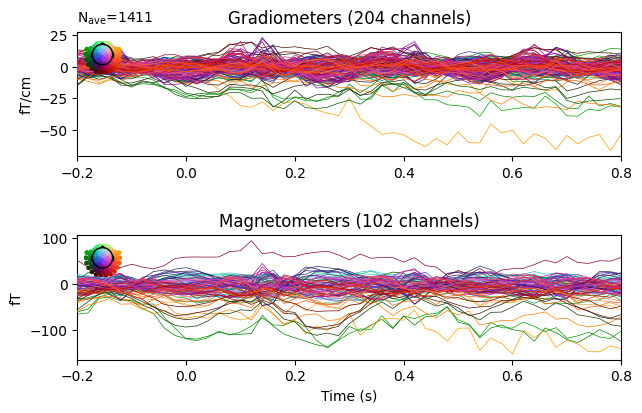

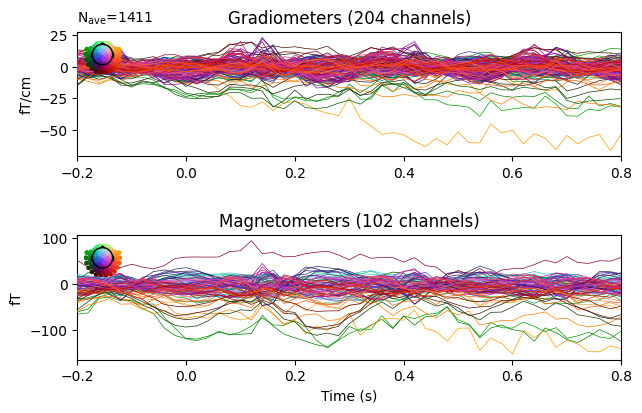

In [34]:
evo = epochs.average(method="median")
evo.plot(spatial_colors=True)

In [24]:
metadata_subset

[]

In [13]:
from mne import Epochs

class CustomEpochs(Epochs):

    def __getitem__(self, key):
        # Parse the key into metadata field name and value
        field, value = key.split('==')
        field = field.strip()
        value = value.strip()

        # Get the indices of the epochs that match the metadata query
        indices = [i for i, metadata in enumerate(self.metadata[field]) if metadata == value]

        # Return a new Epochs object containing only the matching epochs
        return self.__class__(self._data[indices], self.events[indices], self.event_id,
                              tmin=self.tmin, tmax=self.tmax, baseline=self.baseline,
                              metadata=self.metadata.iloc[indices], info=self.info)



In [17]:
custom_epochs = CustomEpochs(epochs, epochs.events, "1", -0.2, 0.8, epochs.baseline, epochs.metadata)

# Get all epochs where the 'kind' metadata field is 'word':
word_epochs = custom_epochs['kind==word']

ValueError: The first argument to `Epochs` must be an instance of mne.io.BaseRaw

In [12]:
custom_epochs['kind=="word"']

KeyError: 'Event name "kind=="word"" could not be found. The following events are present in the data: 1 The epochs.metadata Pandas query did not yield any results: cannot insert level_0, already exists'

In [ ]:
# epoch
def mne_events(meta):
    events = np.ones((len(meta), 3), dtype=int)
    events[:, 0] = meta.start*raw.info['sfreq']
    return dict(events=events, metadata=meta.reset_index())

epochs = mne.Epochs(raw, **mne_events(meta), decim=20, tmin=-.2, tmax=1.5, preload=True)
epochs = epochs['kind=="word"']

In [1]:
from dataset import get_path, get_subjects, epoch_data, epoch_runs
from utils import (
    decod,
    correlate,
    match_list,
    create_target,
    analysis,
    save_decoding_results,
)
from plot import plot_subject
import mne_bids
from pathlib import Path
import pandas as pd
import numpy as np
import mne
import spacy
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import RidgeCV
from wordfreq import zipf_frequency
from Levenshtein import editops
import matplotlib.pyplot as plt

In [9]:
path = get_path("LPP_read")
subjects = get_subjects(path)
RUN = 9
task = "read"
subject = subjects[4]

In [10]:
epochs = epoch_runs(subject, RUN, task, path)

.Running the script on RAW data:
run 01, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-01_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 89000 ... 554999 =     89.000 ...   554.999 secs
Ready.
Reading events from /home/is1538

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 128 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.0s finished


1468 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Adding metadata with 13 columns
1411 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1411 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 02, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-02_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 514999 =      8.000 ...   514.999 secs
Ready.
Reading even

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 134 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.0s finished


1605 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Adding metadata with 13 columns
1562 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1562 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 03, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-03_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 7000 ... 567999 =      7.000 ...   567.999 secs
Ready.
Reading even

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 130 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.6s finished


1718 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Adding metadata with 13 columns
1659 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1659 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 04, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-04_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 9000 ... 500999 =      9.000 ...   500.999 secs
Ready.
Reading even

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 128 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.5s finished


1491 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]
Adding metadata with 13 columns
1443 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1443 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 05, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-05_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 14000 ... 469999 =     14.000 ...   469.999 secs
Ready.
Reading eve

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 136 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.1s finished


1373 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 20]
Adding metadata with 13 columns
1335 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1335 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 06, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-06_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 7000 ... 575999 =      7.000 ...   575.999 secs
Ready.
Reading even

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 134 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw = mne_bids.r

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.4s finished


1699 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Adding metadata with 13 columns
1695 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1695 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 07, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-07_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 12000 ... 529999 =     12.000 ...   529.999 secs
Ready.
Reading eve

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 133 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.7s finished


1554 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Adding metadata with 13 columns
1552 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1552 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 08, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-08_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 460999 =      8.000 ...   460.999 secs
Ready.
Reading even

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 106 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    6.9s finished


1391 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 19 21]
Adding metadata with 13 columns
1318 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1318 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped
.Running the script on RAW data:
run 09, subject: 5
Opening raw data file /home/is153802/data/BIDS_lecture/sub-5/ses-01/meg/sub-5_ses-01_task-read_run-09_meg.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 8000 ... 551999 =      8.000 ...   551.999 secs
Ready.
Reading even

/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Omitted 151 annotation(s) that were outside data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:85: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw = mne_bids.read_raw_bids(bids_path)
/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/readi

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    7.8s finished


1652 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Adding metadata with 13 columns
1578 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)
13 projection items activated
Using data from preloaded Raw for 1578 events and 1001 original time points (prior to decimation) ...


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:146: RuntimeWarning: The measurement information indicates a low-pass frequency of 20.0 Hz. The decim=20 parameter will result in a sampling frequency of 50.0 Hz, which can cause aliasing artifacts.
  epochs = mne.Epochs(raw, **mne_events(meta, raw), decim=20, tmin=-0.2, tmax=0.8)


0 bad epochs dropped


/media/cb271805/272a9f9d-f140-48d6-b390-094ccc29aae0/workspace-LPP/code/neurospin-petit-prince/decoding/reading/dataset.py:320: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs = mne.concatenate_epochs(epochs)


Adding metadata with 14 columns
13553 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 13)


In [21]:
(epochs.metadata).dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [28]:
epochs.load_data()
epochs = epochs['kind=="word"']
epochs["content_word == False"]

KeyError: 'Event name "kind=="word"" could not be found. The following events are present in the data: 1 The epochs.metadata Pandas query did not yield any results: cannot insert level_0, already exists'